# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Brazil (^BVSP)

In [ ]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [ ]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Reading the datas (Source: Yahoo Finance)**

In [ ]:
getSymbols("^BVSP", from = '2000-01-01', to = '2021-10-31') 

Warning message:
“^BVSP contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^BVSP"

**Checking data frequency**

In [ ]:
periodicity(BVSP)        

Daily periodicity from 2000-01-03 to 2021-10-29 

**Identifying missing values (%)**

In [ ]:
round(prop.table(table(is.na(BVSP)))*100, digits = 2)       


FALSE  TRUE 
98.41  1.59 

**Removing missing values**

In [ ]:
BVSP <- na.omit(BVSP)    
round(prop.table(table(is.na(BVSP)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [ ]:
BVSP.df <- BVSP[,'BVSP.Close']                              
head(BVSP.df)

           BVSP.Close
2000-01-03      16930
2000-01-04      15851
2000-01-05      16245
2000-01-06      16107
2000-01-07      16309
2000-01-10      17022

**Calculating log-returns**

In [ ]:
logreturn <- diff(log(BVSP.df$BVSP.Close))*100                     
head(logreturn)

           BVSP.Close
2000-01-03         NA
2000-01-04 -6.5854606
2000-01-05  2.4552579
2000-01-06 -0.8531209
2000-01-07  1.2463143
2000-01-10  4.2789522

**Aggregating the data**

In [ ]:
BVSP.df$BVSP.Return <- logreturn                  
BVSP.df <- na.omit(BVSP.df)
head(BVSP.df)

           BVSP.Close BVSP.Return
2000-01-04      15851  -6.5854606
2000-01-05      16245   2.4552579
2000-01-06      16107  -0.8531209
2000-01-07      16309   1.2463143
2000-01-10      17022   4.2789522
2000-01-11      16573  -2.6731760

**Identifying missing values (%)**

In [ ]:
round(prop.table(table(is.na(BVSP.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [ ]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



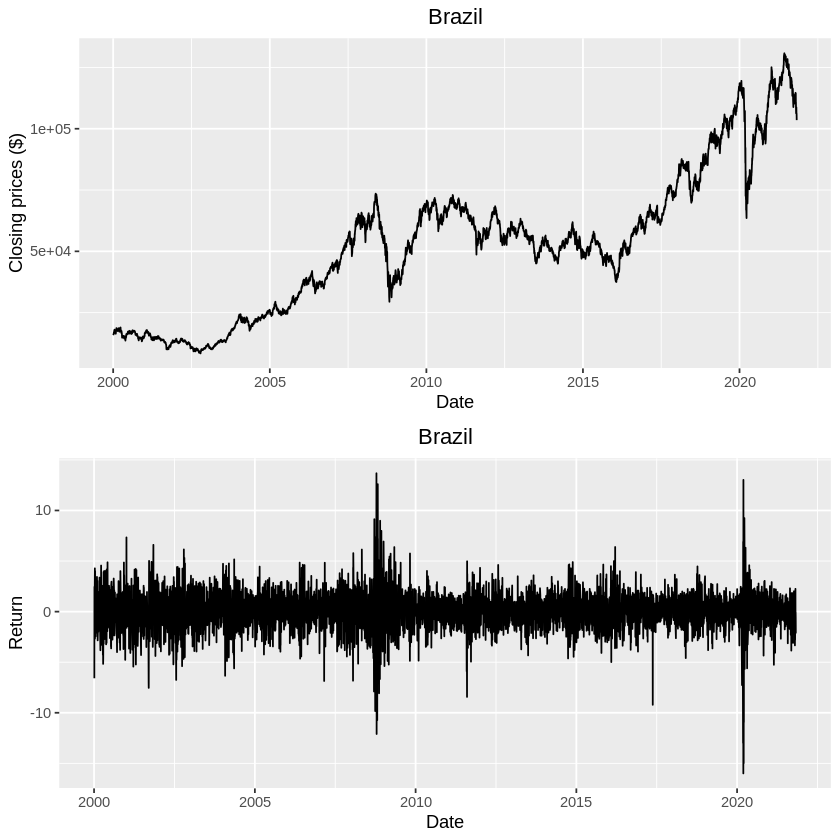

In [ ]:
# Price chart
graph1 <- ggplot(BVSP.df,
                aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Close'])) +
                geom_line(color = "black") +
                ggtitle("Brazil") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(BVSP.df,
                aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Return'])) +
                geom_line(color = "black") +
                ggtitle("Brazil") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [ ]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Descriptive statistic**

In [ ]:
# mean
round(mean(BVSP.df$BVSP.Return), 3)                         

[1] 0.034

In [ ]:
# sd
round(sd(BVSP.df$BVSP.Return), 3)                           

[1] 1.799

In [ ]:
# skewness
round(skewness(BVSP.df$BVSP.Return), 3)                     

[1] -0.349

In [ ]:
# kurtosis
round(kurtosis(BVSP.df$BVSP.Return), 3)                     

[1] 6.468

In [ ]:
# min
round(min(BVSP.df$BVSP.Return), 3)                          

[1] -15.993

In [ ]:
# p5
round(quantile(BVSP.df$BVSP.Return, probs = 0.05), 3)       

5% 
-2.814

In [ ]:
# p25
round(quantile(BVSP.df$BVSP.Return, probs = 0.25), 3)       

25% 
-0.928

In [ ]:
# median
round(median(BVSP.df$BVSP.Return), 3)                       

[1] 0.073

In [ ]:
# p75
round(quantile(BVSP.df$BVSP.Return, probs = 0.75), 3)       

75% 
1.061

In [ ]:
# p95
round(quantile(BVSP.df$BVSP.Return, probs = 0.95), 3)       

95% 
2.654

In [ ]:
# max
round(max(BVSP.df$BVSP.Return), 3)                          

[1] 13.677

In [ ]:
# n observations
length(BVSP.df$BVSP.Return)                                 

[1] 5400

## 4. Series normality analysis

In [ ]:
# Package
library(tseries)

In [ ]:
jarque.bera.test(BVSP.df$BVSP.Return)


	Jarque Bera Test

data:  BVSP.df$BVSP.Return
X-squared = 9524.1, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [ ]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

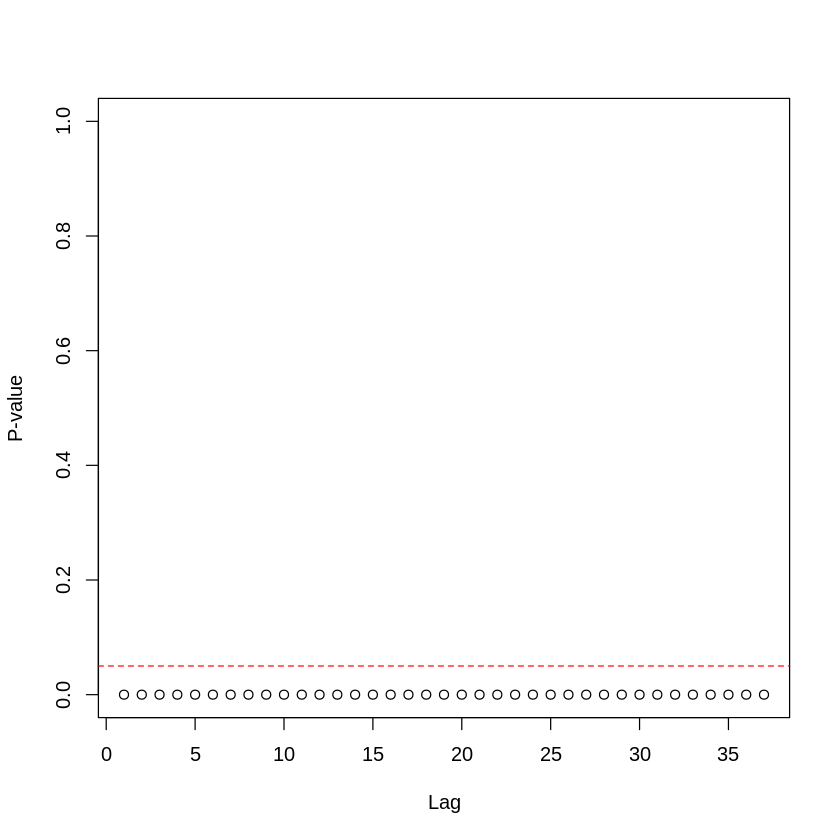

In [ ]:
McLeod.Li.test(y = BVSP.df$BVSP.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [ ]:
ArchTest(BVSP.df$BVSP.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  BVSP.df$BVSP.Return
Chi-squared = 1504.7, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [ ]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [ ]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [ ]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = BVSP.df$BVSP.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0568,0.0201,2.8214,0.0048
omega,0.0634,0.0112,5.6408,0.0000
alpha1,0.0746,0.0069,10.7410,0.0000
beta1,0.9034,0.0090,100.2469,0.0000
skew,0.8987,0.0162,55.4987,0.0000


In [ ]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

BVSP.df$BVSP.VolGARCH <- as.numeric(var.garch)
head(BVSP.df)

[1] 3.237402 6.280458 6.166370 5.695809 5.314515 6.194770

           BVSP.Close BVSP.Return BVSP.VolGARCH
2000-01-04      15851  -6.5854606      3.237402
2000-01-05      16245   2.4552579      6.280458
2000-01-06      16107  -0.8531209      6.166370
2000-01-07      16309   1.2463143      5.695809
2000-01-10      17022   4.2789522      5.314515
2000-01-11      16573  -2.6731760      6.194770

**EGARCH model**

In [ ]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [ ]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = BVSP.df$BVSP.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0201,0.0200,1.0087,0.3131
omega,0.0266,0.0020,13.1740,0.0000
alpha1,-0.0761,0.0069,-10.9937,0.0000
beta1,0.9748,0.0008,1188.2593,0.0000
gamma1,0.1332,0.0109,12.2408,0.0000
skew,0.9043,0.0163,55.4192,0.0000


In [ ]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

BVSP.df$BVSP.VolEGARCH <- as.numeric(var.egarch)
head(BVSP.df)

[1] 3.237040 6.257157 5.832168 5.556133 5.061525 4.998746

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040
2000-01-05      16245   2.4552579      6.280458       6.257157
2000-01-06      16107  -0.8531209      6.166370       5.832168
2000-01-07      16309   1.2463143      5.695809       5.556133
2000-01-10      17022   4.2789522      5.314515       5.061525
2000-01-11      16573  -2.6731760      6.194770       4.998746

**GJR-GARCH model**

In [ ]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [ ]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = BVSP.df$BVSP.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0245,0.0203,1.2059,0.2279
omega,0.0743,0.0118,6.3198,0.0000
alpha1,0.0194,0.0066,2.9468,0.0032
beta1,0.9060,0.0093,97.1242,0.0000
gamma1,0.0953,0.0122,7.8446,0.0000
skew,0.9038,0.0164,55.1173,0.0000


In [ ]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

BVSP.df$BVSP.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(BVSP.df)

[1] 3.236942 8.021005 7.456094 6.917773 6.370705 6.198052

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052

## 7. Realized GARCH model estimation

In [ ]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [ ]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                          solver = 'hybrid',
                          realizedVol = BVSP.df$BVSP.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0031,0.0368,0.0842,0.9329
alpha1,0.9832,0.0364,27.0485,0.0000
beta1,0.0241,0.0134,1.7927,0.0730
eta11,0.0038,0.0015,2.6325,0.0085
eta21,0.0039,0.0008,4.9721,0.0000
delta,0.9739,0.0333,29.2413,0.0000
lambda,0.1056,0.0010,103.9209,0.0000
skew,0.8961,0.0159,56.4901,0.0000
xi,0.0144,0.0367,0.3921,0.6950


In [ ]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

BVSP.df$BVSP.VolRealGARCH <- as.numeric(var.realgarch)
head(BVSP.df)

[1] 3.237984 3.275401 6.285676 6.270997 5.799842 5.407703

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052
           BVSP.VolRealGARCH
2000-01-04          3.237984
2000-01-05          3.275401
2000-01-06          6.285676
2000-01-07          6.270997
2000-01-10          5.799842
2000-01-11          5.407703

**Realized EGARCH**

In [ ]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                            solver = 'hybrid',
                            realizedVol = BVSP.df$BVSP.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0138,0.0345,0.3989,0.6900
alpha1,0.9790,0.0339,28.8418,0.0000
beta1,0.0191,0.0134,1.4197,0.1557
eta11,0.0037,0.0016,2.2593,0.0239
eta21,0.0055,0.0009,6.3366,0.0000
delta,0.9791,0.0310,31.5738,0.0000
lambda,0.1177,0.0011,103.9191,0.0000
skew,0.9012,0.0160,56.3269,0.0000
xi,0.0074,0.0347,0.2124,0.8318


In [ ]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

BVSP.df$BVSP.VolRealEGARCH <- as.numeric(var.realegarch)
head(BVSP.df)

[1] 3.237984 3.274439 6.243652 5.900439 5.620838 5.125770

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052
           BVSP.VolRealGARCH BVSP.VolRealEGARCH
2000-01-04          3.237984           3.237984
2000-01-05          3.275401           3.274439
2000-01-06          6.285676           6.243652
2000-01-07          6.270997           5.900439
2000-01-10          5.799842           5.620838
2000-01-11          5.407703           5.125770

**Realized GJR-GARCH**

In [ ]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                              solver = 'hybrid',
                              realizedVol = BVSP.df$BVSP.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0225,0.0361,0.6221,0.5339
alpha1,0.9767,0.0356,27.4231,0.0000
beta1,0.0104,0.0134,0.7737,0.4391
eta11,0.0038,0.0017,2.2628,0.0236
eta21,0.0053,0.0009,5.8235,0.0000
delta,0.9894,0.0333,29.6725,0.0000
lambda,0.1212,0.0012,103.9194,0.0000
skew,0.9001,0.0161,55.9952,0.0000
xi,-0.0007,0.0367,-0.0198,0.9842


In [ ]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

BVSP.df$BVSP.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(BVSP.df)

[1] 3.237984 3.260613 7.911289 7.434666 6.905488 6.366725

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.237984           3.237984             3.237984
2000-01-05          3.275401           3.274439             3.260613
2000-01-06          6.285676           6.243652             7.911289
2000-01-07          6.270997           5.900439             7.434666
2000-01-10          5.799842           5.620838             6.905488
2000-01-11          5.4077

## 8. Markov-Switching GARCH estimation

In [ ]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [ ]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [ ]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0332     0.0095   3.5015 2.314e-04
alpha1_1   0.0497     0.0126   3.9315 4.221e-05
beta_1     0.9310     0.0039 240.2949    <1e-16
xi_1       0.9326     0.0212  43.9254    <1e-16
alpha0_2   1.3334     0.8325   1.6017 5.462e-02
alpha1_2   0.2270     0.4692   0.4838 3.143e-01
beta_2     0.7524     0.0501  15.0063    <1e-16
xi_2       0.7478     0.1108   6.7496 7.412e-12
P_1_1      0.9754     0.2403   4.0596 2.458e-05
P_2_1      0.4727     0.0227  20.8413    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

BVSP.df$BVSP.VolMSGARCH <- as.numeric(var.msgarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.198827 2.561990 2.356374 2.166948 2.079096 2.519179

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.237984           3.237984             3.237984
2000-01-05          3.275401           3.274439             3.260613
2000-01-06          6.285676           6.243652             7.911289
2000-01-07          6.270997           5.900439             7.434666
2000-01-10          5.799842           5.620838             6.905488
2000-01-11          5.4077

**MS EGARCH**

In [ ]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [ ]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = BVSP.df$BVSP.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0099     0.0032   3.1374 8.522e-04
alpha1_1   0.0733     0.0118   6.2063 2.712e-10
alpha2_1  -0.0563     0.0076  -7.4544 4.508e-14
beta_1     0.9862     0.0032 311.7480    <1e-16
xi_1       0.9221     0.0208  44.3525    <1e-16
alpha0_2   0.1194     0.0365   3.2661 5.451e-04
alpha1_2   0.0586     0.0398   1.4738 7.027e-02
alpha2_2  -0.2195     0.0508  -4.3194 7.822e-06
beta_2     0.9516     0.0165  57.7821    <1e-16
xi_2       0.8966     0.0733  12.2332    <1e-16
P_1_1      0.9910     0.0417  23.7812    <1e-16
P_2_1      0.1137     0.0038  2

In [ ]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

BVSP.df$BVSP.VolMSEGARCH <- as.numeric(var.msegarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.661716 2.157861 2.055353 1.960898 1.865397 2.050499

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.237984           3.237984             3.237984
2000-01-05          3.275401           3.274439             3.260613
2000-01-06          6.285676           6.243652             7.911289
2000-01-07          6.270997           5.900439             7.434666
2000-01-10          5.799842           5.620838             6.905488
2000-01-11          5.4077

**MS GJR-GARCH**

In [ ]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [ ]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0383     0.0102   3.7636 8.373e-05
alpha1_1   0.0161     0.0075   2.1520 1.570e-02
alpha2_1   0.0650     0.0157   4.1359 1.768e-05
beta_1     0.9381     0.0038 249.1593    <1e-16
xi_1       0.9929     0.0287  34.5669    <1e-16
alpha0_2   0.3488     0.0853   4.0875 2.180e-05
alpha1_2   0.0000     0.0006   0.0665 4.735e-01
alpha2_2   0.3560     0.1041   3.4206 3.124e-04
beta_2     0.6845     0.0330  20.7464    <1e-16
xi_2       0.7323     0.0390  18.7795    <1e-16
P_1_1      0.9946     0.0054 183.3672    <1e-16
P_2_1      0.0129     0.002

In [ ]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

BVSP.df$BVSP.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.715081 3.117323 2.813383 2.543530 2.385145 2.308769

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.237402       3.237040         3.236942
2000-01-05      16245   2.4552579      6.280458       6.257157         8.021005
2000-01-06      16107  -0.8531209      6.166370       5.832168         7.456094
2000-01-07      16309   1.2463143      5.695809       5.556133         6.917773
2000-01-10      17022   4.2789522      5.314515       5.061525         6.370705
2000-01-11      16573  -2.6731760      6.194770       4.998746         6.198052
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.237984           3.237984             3.237984
2000-01-05          3.275401           3.274439             3.260613
2000-01-06          6.285676           6.243652             7.911289
2000-01-07          6.270997           5.900439             7.434666
2000-01-10          5.799842           5.620838             6.905488
2000-01-11          5.4077

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [ ]:
# Total number of lines 
nrow(BVSP.df)                

[1] 5400

In [ ]:
# Cut-line
round(nrow(BVSP.df)*0.7, digits = 0)

[1] 3780

In [ ]:
# In-sample
BVSP.df.in <- BVSP.df[1:round(nrow(BVSP.df)*0.7, digits = 0),]
dim(BVSP.df.in)

[1] 3780   11

In [ ]:
# Out-sample
BVSP.df.out <- BVSP.df[(round(nrow(BVSP.df)*0.7, digits = 0)+1):nrow(BVSP.df),]
dim(BVSP.df.out)

[1] 1620   11

# 10. Forecast - GARCH models

In [ ]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [ ]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [ ]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            BVSP.df$BVSP.Return,
                            out.sample = dim(BVSP.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred <- ugarchforecast(garch.fit.pred,
                             n.ahead = 1,
                             n.roll = dim(BVSP.df.out)[1])

garch.forecast <- xts(sigma(garch.pred)[1,],
                            move(as.Date(names(sigma(garch.pred)[1,])), by = 1))

In [ ]:
sigma.garch.pred <- ts(garch.forecast[-1,])
sigma.garch.true <- ts(BVSP.df.out$BVSP.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred,
                             sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred,sigma.garch.true
1,1.327786,1.760713
2,1.360799,1.675286
3,1.329832,1.783510
4,1.341267,1.693582
5,1.309513,1.735630
6,1.333477,1.644356


**Performance evaluation**

In [ ]:
# Forecast Error
garch.error <- sigma.garch[,'sigma.garch.pred'] - sigma.garch[,'sigma.garch.true']
head(garch.error)

A Time Series:
[1] -0.4329266 -0.3144870 -0.4536778 -0.3523143 -0.4261174 -0.3108793

In [ ]:
# Mean Square Error Loss
garch.mse <- MSE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mse, digits = 3)     

[1] 20.369

In [ ]:
# Mean Absolute Error Loss
garch.mae <- MAE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mae, digits = 3)

[1] 1.302

In [ ]:
# Root Mean Square Error Loss
garch.rmse <- RMSE(sigma.garch[,'sigma.garch.pred'], 
                   sigma.garch[,'sigma.garch.true'])
round(garch.rmse, digits = 3)

[1] 4.513

In [ ]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3) 

[1] 1.394

In [ ]:
# Linear regression to assess forecast performance 
garch.model <- lm(sigma.garch.true ~ sigma.garch.pred,
                  data = sigma.garch)
round(coeftest(garch.model, NeweyWest(garch.model,
                                      lag = bwNeweyWest(garch.model),
                                      prewhite = F)), 3)
round(summary(garch.model)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -7.672      1.078  -7.117 < 2.2e-16 ***
sigma.garch.pred    6.760      0.736   9.179 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.883

##(b) EGARCH

**Forecast**

In [ ]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [ ]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             BVSP.df$BVSP.Return,
                             out.sample = dim(BVSP.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred <- ugarchforecast(egarch.fit.pred,
                              n.ahead = 1,
                              n.roll = dim(BVSP.df.out)[1])

egarch.forecast<- xts(sigma(egarch.pred)[1,],
                      move(as.Date(names(sigma(egarch.pred)[1,])), by = 1))

In [ ]:
sigma.egarch.pred<- ts(egarch.forecast[-1,])
sigma.egarch.true <- ts(BVSP.df.out$BVSP.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred,sigma.egarch.true
1,1.194694,1.385157
2,1.187533,1.385716
3,1.184112,1.378174
4,1.268489,1.371933
5,1.251812,1.597812
6,1.237840,1.552781


**Performance evaluation**

In [ ]:
# Forecast Error 
egarch.error <- sigma.egarch[,'sigma.egarch.pred'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error)

A Time Series:
[1] -0.1904629 -0.1981839 -0.1940612 -0.1034442 -0.3460008 -0.3149412

In [ ]:
# Mean Square Error Loss
egarch.mse <- MSE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse, digits = 3)     

[1] 12.156

In [ ]:
# Mean Square Error Loss Relative
egarch.mse.relative <- egarch.mse/garch.mse
round(egarch.mse.relative, digits = 3) 

[1] 0.597

In [ ]:
# Mean Absolute Error Loss
egarch.mae <- MAE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae, digits = 3)

[1] 1.16

In [ ]:
# Mean Absolute Error Relative
egarch.mae.relative <- egarch.mae/garch.mae
round(egarch.mae.relative, digits = 3) 

[1] 0.891

In [ ]:
# Root Mean Square Error Loss
egarch.rmse <- RMSE(sigma.egarch[,'sigma.egarch.pred'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse, digits = 3)

[1] 3.486

In [ ]:
# Root Mean Square Error Loss Relative
egarch.rmse.relative <- egarch.rmse/garch.rmse
round(egarch.rmse.relative, digits = 3) 

[1] 0.772

In [ ]:
# Quasi-likelihood loss function
h <- sigma.egarch[,'sigma.egarch.true']

h.hat <- sigma.egarch[,'sigma.egarch.pred']     
egarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(egarch.qlike, digits = 3) 

[1] 1.374

In [ ]:
# Diebold-Mariano test for predictive accuracy
e1 <- egarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -4.517, Forecast horizon = 1, Loss function power = 2, p-value =
6.725e-06
alternative hypothesis: two.sided


In [ ]:
# Linear regression to assess forecast performance
egarch.model <- lm(sigma.egarch.true ~ sigma.egarch.pred, 
                   data = sigma.egarch)
round(coeftest(egarch.model, NeweyWest(egarch.model,
                                       lag = bwNeweyWest(egarch.model),
                                       prewhite = F)), 3)
round(summary(egarch.model)$adj.r.squared, 3)


t test of coefficients:

                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -6.172      1.238  -4.986 < 2.2e-16 ***
sigma.egarch.pred    5.806      0.850   6.835 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.854

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [ ]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [ ]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                BVSP.df$BVSP.Return,
                                out.sample = dim(BVSP.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = BVSP.df$BVSP.VolGARCH)

In [ ]:
# Forecast calculated through adjustment
realgarch.pred <- ugarchforecast(realgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(BVSP.df.out)[1])

realgarch.forecast <- xts(sigma(realgarch.pred)[1,],
                          move(as.Date(names(sigma(realgarch.pred)[1,])), by = 1))

In [ ]:
sigma.realgarch.pred <- ts(realgarch.forecast[-1,])
sigma.realgarch.true <- ts(BVSP.df.out$BVSP.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred,
                                 sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred,sigma.realgarch.true
1,1.346034,1.895885
2,1.313116,1.776636
3,1.347897,1.689204
4,1.316615,1.794260
5,1.334734,1.707747
6,1.296460,1.747348


**Performance evaluation**

In [ ]:
# Forecast Error
realgarch.error <- sigma.realgarch[,'sigma.realgarch.pred'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error)

A Time Series:
[1] -0.5498512 -0.4635205 -0.3413072 -0.4776451 -0.3730128 -0.4508883

In [ ]:
# Mean Square Error Loss
realgarch.mse <- MSE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse, digits = 3)

[1] 21.691

In [ ]:
# Mean Square Error Loss Relative
realgarch.mse.relative <- realgarch.mse/garch.mse
round(realgarch.mse.relative, digits = 3) 

[1] 1.065

In [ ]:
# Mean Absolute Error Loss
realgarch.mae <- MAE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae, digits = 3)

[1] 1.339

In [ ]:
# Mean Absolute Error Loss Relative
realgarch.mae.relative <- realgarch.mae/garch.mae
round(realgarch.mae.relative, digits = 3) 

[1] 1.028

In [ ]:
# Root Mean Square Error Loss
realgarch.rmse <- RMSE(sigma.realgarch[,'sigma.realgarch.pred'],
                       sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse, digits = 3)

[1] 4.657

In [ ]:
# Root Mean Square Error Loss Relative
realgarch.rmse.relative <- realgarch.rmse/garch.rmse
round(realgarch.rmse.relative, digits = 3) 

[1] 1.032

In [ ]:
# Quasi-likelihood loss function
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat <- sigma.realgarch[,'sigma.realgarch.pred']     
realgarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realgarch.qlike, digits = 3)

[1] 1.397

In [ ]:
# Diebold-Mariano test for predictive accuracy
e1 <- realgarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 1.0212, Forecast horizon = 1, Loss function power = 2, p-value =
0.3073
alternative hypothesis: two.sided


In [ ]:
# Linear regression to assess forecast performance
realgarch.model <- lm(sigma.realgarch.true ~ sigma.realgarch.pred,
                      data = sigma.realgarch)
round(coeftest(realgarch.model, NeweyWest(realgarch.model,
                                          lag = bwNeweyWest(realgarch.model),
                                          prewhite = F)), 3)
round(summary(realgarch.model)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -7.861      0.872  -9.018 < 2.2e-16 ***
sigma.realgarch.pred    6.887      0.593  11.619 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.895

##(b) Realized EGARCH

**Forecast**

In [ ]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [ ]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 BVSP.df$BVSP.Return,
                                 out.sample = dim(BVSP.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = BVSP.df$BVSP.VolEGARCH)

In [ ]:
# Forecast calculated through adjustment
realegarch.pred <- ugarchforecast(realegarch.fit.pred,
                                  n.ahead = 1,
                                  n.roll = dim(BVSP.df.out)[1])

realegarch.forecast <- xts(sigma(realegarch.pred)[1,],
                           move(as.Date(names(sigma(realegarch.pred)[1,])), by = 1))

In [ ]:
sigma.realegarch.pred <- ts(realegarch.forecast[-1,])
sigma.realegarch.true <- ts(BVSP.df.out$BVSP.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred,
                                  sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred,sigma.realegarch.true
1,1.193090,1.535843
2,1.198712,1.406237
3,1.190294,1.404427
4,1.186907,1.396909
5,1.280094,1.390574
6,1.267673,1.614199


**Performance evaluation**

In [ ]:
# Forecast Error
realegarch.error <- sigma.realegarch[,'sigma.realegarch.pred'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error)

A Time Series:
[1] -0.3427527 -0.2075254 -0.2141333 -0.2100023 -0.1104793 -0.3465256

In [ ]:
# Mean Square Error Loss
realegarch.mse <- MSE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse, digits = 3)

[1] 12.195

In [ ]:
# Mean Square Error Loss Relative
realegarch.mse.relative <- realegarch.mse/garch.mse
round(realegarch.mse.relative, digits = 3) 

[1] 0.599

In [ ]:
# Mean Absolute Error Loss
realegarch.mae <- MAE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae, digits = 3)

[1] 1.167

In [ ]:
# Mean Absolute Error Relative
realegarch.mae.relative <- realegarch.mae/garch.mae
round(realegarch.mae.relative, digits = 3) 

[1] 0.896

In [ ]:
# Root Mean Square Error Loss 
realegarch.rmse <- RMSE(sigma.realegarch[,'sigma.realegarch.pred'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse, digits = 3)

[1] 3.492

In [ ]:
# Root Mean Square Error Loss Relative
realegarch.rmse.relative <- realegarch.rmse/garch.rmse
round(realegarch.rmse.relative, digits = 3) 

[1] 0.774

In [ ]:
# Quasi-likelihood loss function
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat <- sigma.realegarch[,'sigma.realegarch.pred']     
realegarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realegarch.qlike, digits = 3)

[1] 1.39

In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e1 <- realegarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -3.9968, Forecast horizon = 1, Loss function power = 2, p-value =
6.709e-05
alternative hypothesis: two.sided


In [ ]:
# Linear regression to assess forecast performance
realegarch.model <- lm(sigma.realegarch.true ~ sigma.realegarch.pred,
                       data = sigma.realegarch)
round(coeftest(realegarch.model, NeweyWest(realegarch.model,
                                           lag = bwNeweyWest(realegarch.model),
                                           prewhite = F)), 3)
round(summary(realegarch.model)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -6.139      1.154  -5.319 < 2.2e-16 ***
sigma.realegarch.pred    5.712      0.779   7.337 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.862

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [ ]:
BVSP.df.month <- apply.monthly(BVSP.df, FUN = mean)
head(BVSP.df.month)

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-31   16926.16  -0.1712518      5.290967       4.792658         5.402540
2000-02-29   17803.95   0.3559659      3.654239       3.699293         3.324386
2000-03-31   18055.43   0.0429487      3.469941       3.476927         3.265809
2000-04-28   15909.95  -0.7212252      5.858984       7.114545         6.900235
2000-05-31   14694.45  -0.1732237      4.942027       5.647476         5.242398
2000-06-30   16457.95   0.5328788      4.409521       3.756469         3.255217
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-31          5.338298           4.794335             5.364158
2000-02-29          3.762559           3.792122             3.410389
2000-03-31          3.442430           3.448384             3.215313
2000-04-28          5.828947           7.069114             6.736731
2000-05-31          5.064152           5.783118             5.355792
2000-06-30          4.5632

##(b) Lag Length Selection

In [ ]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
lags.select(BVSP.df.month$BVSP.VolGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [ ]:
lags.select(BVSP.df.month$BVSP.VolEGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [ ]:
lags.select(BVSP.df.month$BVSP.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [ ]:
lags.select(BVSP.df.month$BVSP.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

##(c) Import dataset

In [ ]:
# Package
library(readxl)

In [ ]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [ ]:
attach(EPU)

**VIX**

In [ ]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-10-31', periodicity = "monthly")

[1] "^VIX"

In [ ]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [ ]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [ ]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(EPU$Brazil, 1))
lag.gepu <- ts(Lag(EPU$GEPU_current, 1))
lag.vix <- ts(Lag(VIX$VIX.Close, 1))

**Linear GARCH**

In [ ]:
# Estimation 1 - GARCH (Best BIC:  lag= 2)
garch <- ts(log(BVSP.df$BVSP.VolGARCH))
lag.garch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 2))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.207      0.046  26.259   <2e-16 ***
lag.garch.1    0.108      0.040   2.680    0.008 ** 
lag.garch.2    0.034      0.040   0.847    0.398    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.045

In [ ]:
# Estimation 2 - GARCH (Best BIC:  lag= 2)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.226      0.081  15.140   <2e-16 ***
lag.garch.1    0.120      0.044   2.707    0.007 ** 
lag.garch.2    0.034      0.039   0.875    0.383    
lag.epu        0.000      0.000  -0.573    0.567    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.05

In [ ]:
# Estimation 3 - GARCH (Best BIC:  lag= 2)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.207      0.083  14.576   <2e-16 ***
lag.garch.1    0.108      0.057   1.898    0.059 .  
lag.garch.2    0.034      0.039   0.859    0.391    
lag.vix        0.000      0.005   0.006    0.996    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.042

In [ ]:
# Estimation 4 - GARCH (Best BIC:  lag= 2)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.231      0.104  11.834   <2e-16 ***
lag.garch.1    0.124      0.065   1.900    0.059 .  
lag.garch.2    0.035      0.040   0.873    0.383    
lag.epu        0.000      0.000  -0.581    0.562    
lag.vix        0.000      0.005  -0.097    0.922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.046

In [ ]:
# Estimation 5 - GARCH (Best BIC:  lag= 2)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.227      0.107  11.428   <2e-16 ***
lag.garch.1    0.128      0.058   2.232    0.026 *  
lag.garch.2    0.035      0.040   0.871    0.384    
lag.epu        0.000      0.000  -0.683    0.495    
lag.gepu       0.000      0.001   0.216    0.829    
lag.vix       -0.001      0.004  -0.207    0.836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.043

**EGARCH**

In [ ]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(BVSP.df.month$BVSP.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     0.281      0.048   5.895 < 2.2e-16 ***
lag.egarch.1    0.701      0.048  14.618 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.491

In [ ]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 5)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.32388    0.04898  6.6119  < 2e-16 ***
lag.egarch.1  0.70607    0.04961 14.2319  < 2e-16 ***
lag.epu      -0.00031    0.00015 -2.0560  0.04081 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.489

In [ ]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.118      0.061   1.952    0.052 .  
lag.egarch.1    0.546      0.072   7.598   <2e-16 ***
lag.vix         0.015      0.005   3.042    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.526

In [ ]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.157      0.062   2.534    0.012 *  
lag.egarch.1    0.549      0.073   7.510   <2e-16 ***
lag.epu         0.000      0.000  -1.286    0.200    
lag.vix         0.015      0.005   2.961    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.524

In [ ]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.219      0.075   2.931    0.004 ** 
lag.egarch.1    0.492      0.072   6.818   <2e-16 ***
lag.epu         0.000      0.000   1.269    0.206    
lag.gepu       -0.001      0.000  -4.876   <2e-16 ***
lag.vix         0.020      0.006   3.460    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

**Realized Linear GARCH**

In [ ]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 2)
realgarch <- ts(log(BVSP.df.month$BVSP.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 2))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.283      0.051   5.587   <2e-16 ***
lag.realgarch.1    0.844      0.073  11.632   <2e-16 ***
lag.realgarch.2   -0.140      0.065  -2.139    0.033 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.554

In [ ]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.293      0.062   4.749   <2e-16 ***
lag.realgarch.1    0.843      0.080  10.589   <2e-16 ***
lag.realgarch.2   -0.139      0.072  -1.939    0.054 .  
lag.epu            0.000      0.000  -0.281    0.779    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

In [ ]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.073      0.051   1.425    0.155    
lag.realgarch.1    0.652      0.079   8.209   <2e-16 ***
lag.realgarch.2   -0.171      0.058  -2.956    0.003 ** 
lag.vix            0.021      0.006   3.730   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.617

In [ ]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.070      0.065   1.077    0.282    
lag.realgarch.1    0.643      0.084   7.674   <2e-16 ***
lag.realgarch.2   -0.172      0.057  -3.028    0.003 ** 
lag.epu            0.000      0.000   0.282    0.778    
lag.vix            0.022      0.006   3.698   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.613

In [ ]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.136      0.070   1.948    0.053 .  
lag.realgarch.1    0.585      0.076   7.684   <2e-16 ***
lag.realgarch.2   -0.172      0.058  -2.950    0.003 ** 
lag.epu            0.001      0.000   3.333    0.001 ***
lag.gepu          -0.002      0.000  -5.729   <2e-16 ***
lag.vix            0.027      0.006   4.473   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.641

**Realized EGARCH**

In [ ]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(BVSP.df.month$BVSP.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         0.286      0.049   5.875 < 2.2e-16 ***
lag.realegarch.1    0.700      0.048  14.489 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.49

In [ ]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.324      0.050   6.481   <2e-16 ***
lag.realegarch.1    0.705      0.050  14.003   <2e-16 ***
lag.epu             0.000      0.000  -1.783    0.076 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.487

In [ ]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.111      0.062   1.794    0.074 .  
lag.realegarch.1    0.535      0.072   7.439   <2e-16 ***
lag.vix             0.017      0.005   3.188    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.532

In [ ]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.144      0.064   2.244    0.026 *  
lag.realegarch.1    0.537      0.073   7.342   <2e-16 ***
lag.epu             0.000      0.000  -1.078    0.282    
lag.vix             0.017      0.005   3.114    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.529

In [ ]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.208      0.076   2.741    0.007 ** 
lag.realegarch.1    0.481      0.072   6.693   <2e-16 ***
lag.epu             0.000      0.000   1.446    0.149    
lag.gepu           -0.001      0.000  -4.918   <2e-16 ***
lag.vix             0.021      0.006   3.560   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.553